<a href="https://colab.research.google.com/github/MuhammadMurtuzaZafar/outlier_remover/blob/main/outlier_remover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import seaborn as sns

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
df=pd.read_csv('/content/drive/MyDrive/dataset/heights.csv')
df.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [14]:
df.height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: height, dtype: float64

<Axes: xlabel='height', ylabel='Count'>

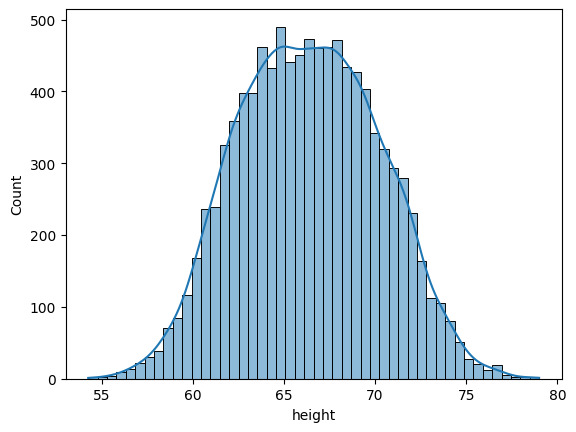

In [16]:
sns.histplot(df.height,kde=True)

In [17]:
mean=df.height.mean()
mean

66.367559754866

In [18]:
std_deviation=df.height.std()
std_deviation

3.847528120795573

In [28]:
pos_x=mean + 3*std_deviation
pos_x

77.91014411725271

In [30]:
neg_x=mean - 3*std_deviation
neg_x

54.824975392479274

In [31]:
df[df.height>pos_x]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374


In [33]:
df[df.height<neg_x]

,gender,height
6624,Female,54.616858
9285,Female,54.263133


In [35]:
df_no_outliers=df[(df.height<pos_x) & (df.height>neg_x)]
df_no_outliers.shape

(9993, 2)

In [36]:
df['z_score_height']=(df.height-mean)/std_deviation
df.head()

,gender,height,z_score_height
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


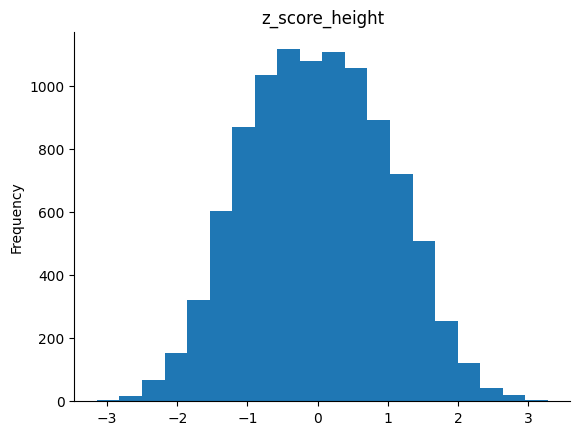

In [39]:
# @title z_score_height

from matplotlib import pyplot as plt
df['z_score_height'].plot(kind='hist', bins=20, title='z_score_height')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='height', ylabel='Count'>

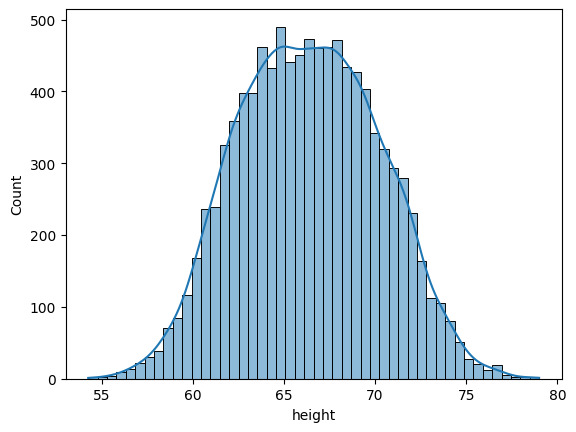

In [37]:
sns.histplot(df.height,kde=True)